In [1]:
# modify if necessary
%matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import binny

Using matplotlib backend: MacOSX


In [2]:
# create some very normal data with lots of noise
N      = 1000
np.random.seed(123)

x      = np.random.normal(scale=5, size=N)
y_tru  = 5 * x + 1
y_obs  = y_tru + np.random.normal(scale=100, size=N)

df     = pd.DataFrame(
    {
        'y_tru':  y_tru,
        'y_obs':  y_obs,
    },
    index=x
)

In [3]:
df.head()

,y_tru,y_obs
-5.428153,-26.140765,-101.023512
4.986727,25.933636,82.693109
1.414892,8.074462,79.889517
-7.531474,-36.657368,-136.595443
-2.893001,-13.465006,34.024826


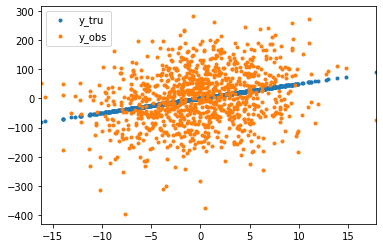

In [4]:
# this looks indeed very noisy
plt.close(1)
fig, ax = plt.subplots(num=1)
df.plot(y=['y_tru','y_obs'], style=['.', '.'], ax=ax)

In [5]:
# binny allows us to bin using very little code
binned = binny.bin_df(
    # the input data from above
    df,
    # how to bin the df columns. default is just mean.
    # here, we also want the standard error
    bin_col_func=['mean','se'],
    # choose the number of bins
    bins=10
)

In [6]:
# voilà
binned

y_tru                y_obs           
                 mean        se       mean         se
x                                                    
-14.779285 -72.896423  2.231899 -11.023319  38.306450
-10.401970 -51.009852  0.930757 -56.300929  14.676493
-6.349354  -30.746770  0.483002 -36.272024   7.453882
-1.999380   -8.996899  0.344399  -0.513227   5.315838
 1.985338   10.926692  0.376014   9.736130   5.483252
 6.251109   32.255546  0.509429  28.471377   7.805379
 10.260005  52.300025  1.076102  47.935794  23.046125
 15.494680  78.473398  4.954823  46.768803  49.561006

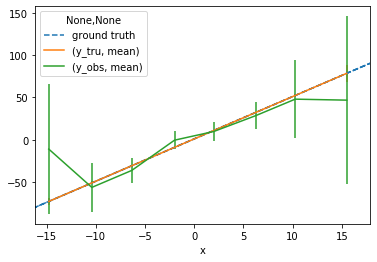

In [7]:
# plot the end result: we reconstructed the underlying regularity
# binning the "hidden" variable shows that the result is not biased
plt.close(2)
fig, ax = plt.subplots(num=2)
df.plot(y='y_tru', style='--', ax=ax, label='ground truth')
binned.plot(
    y=[('y_tru','mean'),('y_obs','mean')], 
    yerr=[2*binned.y_tru.se, 2*binned.y_obs.se],
    style='.',
    ax=ax
)

In [8]:
# sometimes our dependent variable is not is not evenly distributed:

df2 = pd.DataFrame(
    {
        'y_tru':  y_tru,
        'y_obs':  y_obs,
    },
    index=np.exp(x)
)

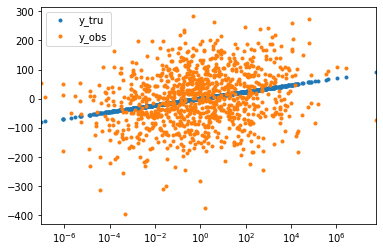

In [9]:
# this looks indeed very noisy
plt.close(3)
fig, ax = plt.subplots(num=3)
df2.plot(y=['y_tru','y_obs'], style=['.', '.'], logx=True, ax=ax)

In [10]:
# binny allows us to use logarithmic or quantile-base bin sizes.
# the latter contain an equal number of samples each
binned_2 = binny.bin_df(
    # the input data from above
    df2,
    # how to bin the df columns. default is just mean.
    # here, we also want the standard error
    bin_col_func=['mean','se','count'],
    # choose the number of bins
    bins=15,
    # choose between 'lin', 'log', 'q' bins
    space='log',
    # it can make sense to drop extreme outliers
    drop_edges=True
)

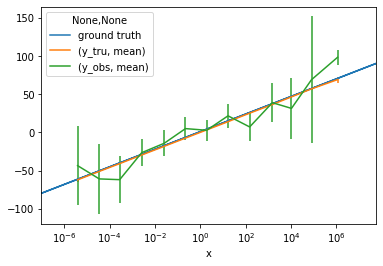

In [11]:
plt.close(4)
fig, ax = plt.subplots(num=4)
df2.plot(y='y_tru', style='-', ax=ax, label='ground truth')
binned_2.plot(
    y=[('y_tru','mean'),('y_obs','mean')], 
    yerr=[2*binned_2.y_tru.se, 2*binned_2.y_obs.se],
    style='.',
    ax=ax,
    logx=True
)

In [12]:
# binny allows us to use logarithmic or quantile-base bin sizes.
# the latter contain an equal number of samples each
binned_2q = binny.bin_df(
    # the input data from above
    df2,
    # how to bin the df columns. default is just mean.
    # here, we also want the standard error
    bin_col_func=['mean','se','count'],
    # choose the number of bins
    bins=15,
    # choose between 'lin', 'log', 'q' bins
    space='q',
    # it can make sense to drop extreme outliers
    drop_edges=True,
    # we can also choose how the bin center is calculated 
    # to deal with wild fluctuations
    bin_pos_func='median'
)

In [13]:
binned_2q

y_tru                      y_obs                 
                  mean        se count       mean         se count
x                                                                 
0.001318    -32.453733  0.326209    67 -29.793870  11.415332    67
0.005393    -24.792466  0.265814    66 -33.206401  10.615072    66
0.024830    -17.710809  0.202165    67 -20.641675  11.878945    67
0.064873    -12.419466  0.191801    67   0.074146  10.564793    67
0.169263     -7.962619  0.135105    66   9.591540  12.908533    66
0.369516     -4.008335  0.134142    67   8.146828  11.998405    67
0.813927     -0.150897  0.153344    66   4.879380  10.739714    66
1.779787      3.776912  0.129027    67  -8.913771  11.816480    67
4.054056      7.876878  0.151076    67  23.829290  11.224042    67
10.451731    12.831747  0.224752    66  23.279661  11.023410    66
33.950290    18.898130  0.212984    67   0.531197  11.279621    67
130.248320   25.173428  0.184669    66  14.576711  11.927454    66
531.757136   32.447412  0.385744    67  38.798775  12.454342    67
6120.405419  46.890729  0.980066    66  34.703133  12.719013    66

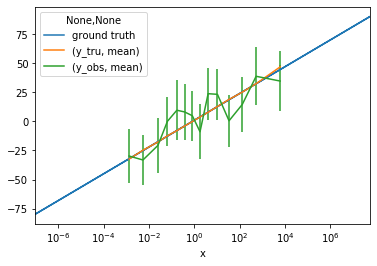

In [14]:
# now the error is no longer influenced from the different
# sample counts in the bins
plt.close(5)
fig, ax = plt.subplots(num=5)
df2.plot(y='y_tru', style='-', ax=ax, label='ground truth')
binned_2q.plot(
    y=[('y_tru','mean'),('y_obs','mean')], 
    yerr=[2*binned_2q.y_tru.se, 2*binned_2q.y_obs.se],
    style='.',
    ax=ax,
    logx=True
)